In [83]:
import pandas as pd
import scipy as sc
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from operator import truediv, mul

# Data_cleaned

In [2]:
data_cleaned = pd.read_csv("data/data_cleaned.csv")
label = data_cleaned["Categorie1"].values
features = sc.sparse.load_npz("data/feature_sparse.npz")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42)

### Apprentissage

In [4]:
ts = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
te = time.time()
print(te-ts, "sec")
train_score = lr.score(X_train,y_train) 
print(train_score) #Nombre de descriptions dont la prédiction est juste/Nombre de descriptions total

/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


47.58679509162903 sec
0.9869777777777777


### Prediction

In [5]:
Y_train_predict = lr.predict(X_train)

In [6]:
test_score = lr.score(X_test,y_test)
print(test_score)

0.9011


### Plot

In [11]:
cat = list(set(y_train)) #recup toutes les categories

TP=[0] #chiffres bruts
FN=[0]
nb_data=[0]

for i in cat :
    cat_name = str(i)
    Y_train_predict_cat = Y_train_predict==cat_name
    y_train_cat = y_train==cat_name
    n_data = 0
    for k in y_train_cat:
        if k== True:
            n_data +=1
    nb_data += [n_data]
    A=pd.crosstab(y_train_cat, Y_train_predict_cat, rownames=["Ground True"], colnames=["Prediction"])
    TP += [A[1][1]]
    FN += [A[0][1]]

In [12]:
d = {'data':nb_data, 'True positive':TP, 'False negative':FN}
pd.DataFrame(d).T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
data,0,1919,2302,331,10,235,5414,180,4282,59,...,1732,2850,1223,152,1826,19173,144,289,135,4
True positive,0,1904,2240,322,10,228,5405,177,4232,59,...,1722,2789,1177,148,1772,19079,139,281,135,3
False negative,0,15,62,9,0,7,9,3,50,0,...,10,61,46,4,54,94,5,8,0,1


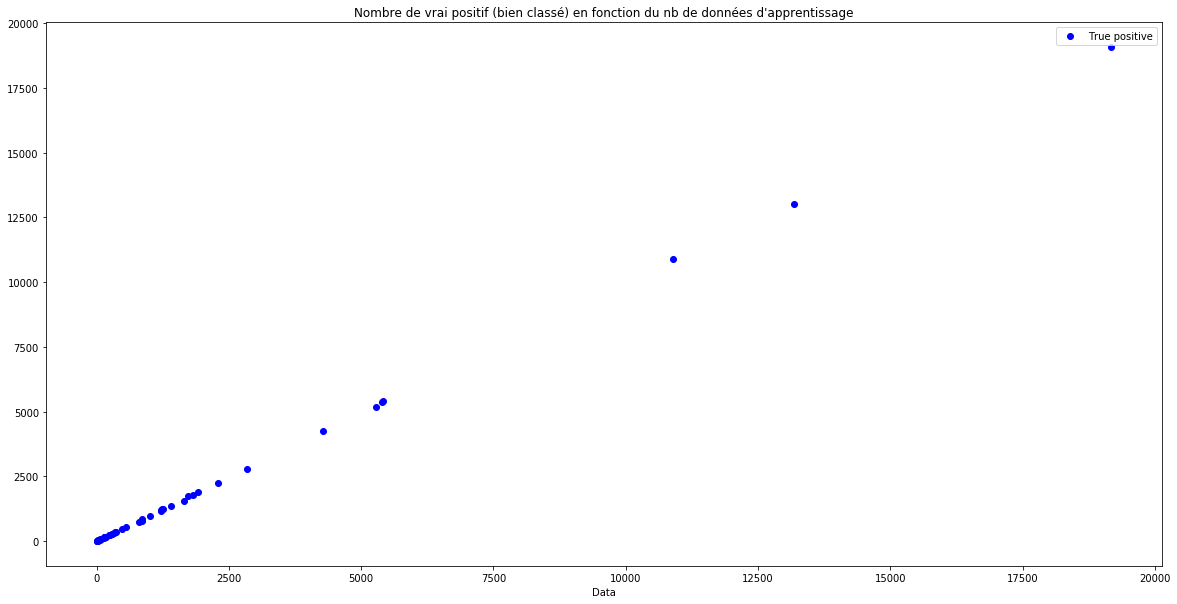

In [9]:
fig=plt.figure(figsize=(20,10))
plt.title("Nombre de vrai positif (bien classé) en fonction du nb de données d'apprentissage")
plt.plot(nb_data, TP, 'bo', label="True positive")
plt.xlabel('Data')
plt.legend()
plt.show()

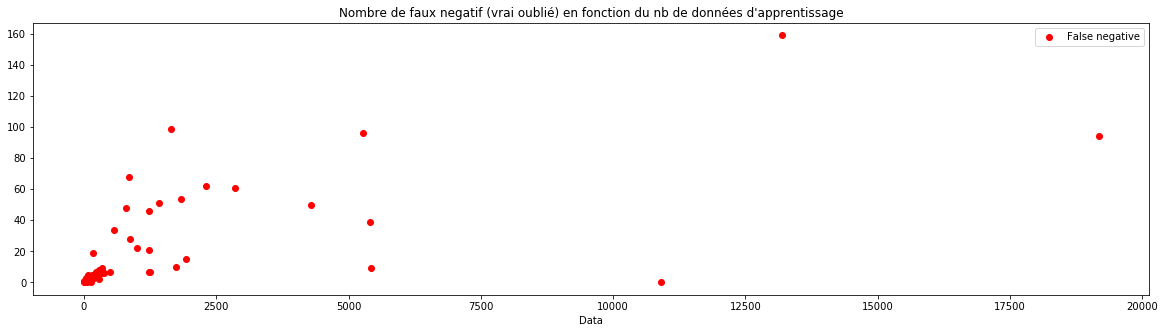

In [10]:
fig=plt.figure(figsize=(20,5))
plt.title("Nombre de faux negatif (vrai oublié) en fonction du nb de données d'apprentissage")
plt.plot(nb_data,FN, "ro", label="False negative")
plt.xlabel('Data')
plt.legend()
plt.show()

### Comments:

Pas ouf, ca sert à rien de voir sur l'ensemble des catégories on veut voir l'évolution par catégorie

In [110]:
def plot_category(datamin,datamax,measures,cat):
    TP = []
    FN = []
    nb_data=[]
    PFN =[]
    if datamin is None : 
        datamin= 10000
    if datamax is None :
        datamax= 90000
    if measures is None:
        measures = 10

    cat_name=str(cat)
    
    scale =int((datamax-datamin)/measures)
    for nb_used in range(datamin,datamax,scale): ## Regression en faisant varier notre nb données utilisé pr l'apprentissage
        X_small_train = X_train[0:nb_used]
        y_small_train = y_train[0:nb_used]
        lr_small = LogisticRegression()
        lr_small.fit(X_small_train, y_small_train)
        Y_small_train_predict = lr_small.predict(X_small_train)
        Y_small_train_predict_cat = Y_small_train_predict==cat_name
        y_small_train_cat = y_small_train==cat_name
        n_data = 0
        for k in y_small_train_cat:
            if k == True:
                n_data +=1
        nb_data += [n_data]
        A=pd.crosstab(y_small_train_cat, Y_small_train_predict_cat, rownames=["Ground True"], colnames=["Prediction"])
        AB = A.divide(A.sum(axis=1),axis=0)*100
        TP += [A[1][1]]
        FN += [A[0][1]]
        PFN += [AB[0][1]]
        
        
    fig=plt.figure(figsize=(8,5))
    plt.title("Evolution des faux negatifs en fonction du nb de données d'apprentissage pour la catégorie")
    plt.plot(nb_data,FN, "ro", label="False Negative")
    plt.xlabel("Data used for the training part")
    plt.legend()
    plt.show()

    fig=plt.figure(figsize=(8,5))
    plt.title("Evolution des false negative en % en fonction du nb de données d'apprentissage pour la catégorie")
    plt.plot(nb_data,PFN, "go",label="False Negative %")
    plt.xlabel("Data used for the training part")
    plt.legend()
    plt.show()

    fig=plt.figure(figsize=(8,5))
    plt.title("Evolution des vrai positifs en fonction du nb de données d'apprentissage pour la catégorie")
    plt.plot(nb_data,TP, "bo",label="True Positive")
    plt.xlabel("Data used for the training part")
    plt.legend()
    plt.show()
    
    
    

/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

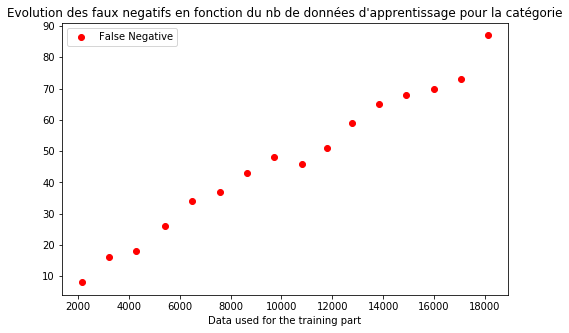

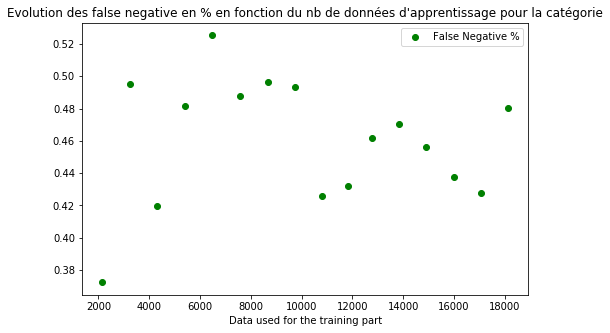

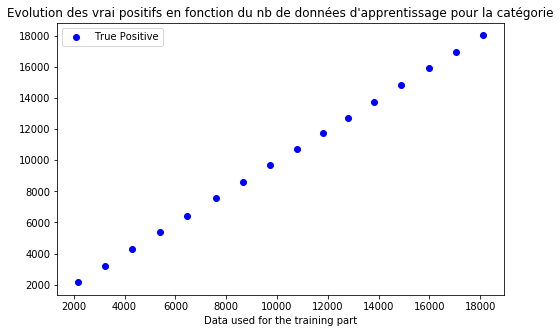

In [112]:
plot_category(10000,90000,16,"TELEPHONIE - GPS")

/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

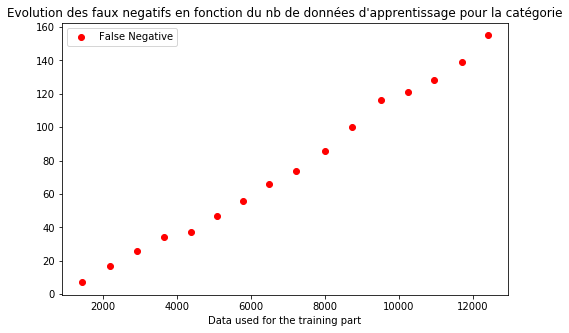

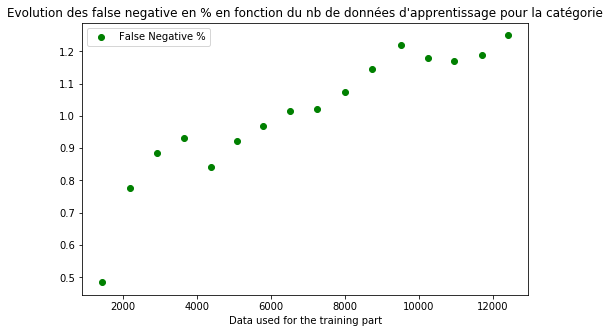

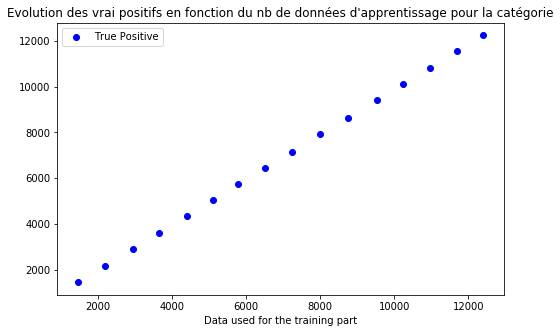

In [115]:
plot_category(10000,90000,16,"INFORMATIQUE")

/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/paulbrunet/anaconda3/envs/Projet4A/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

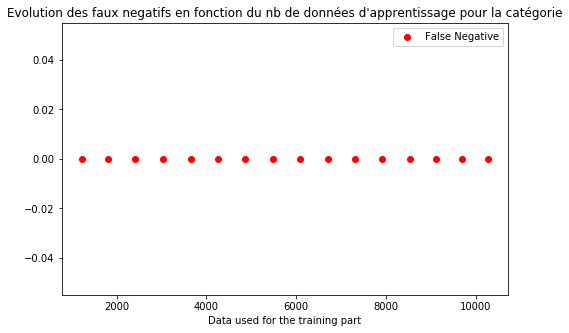

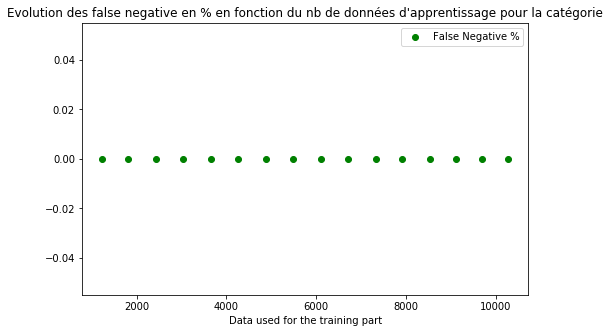

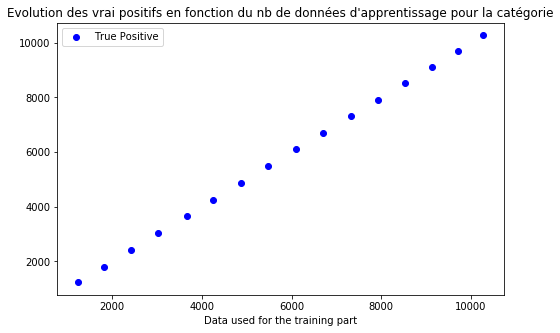

In [116]:
plot_category(10000,90000,16,"LIBRAIRIE")

### Comments:

Ce qu'on veut: tracer l'évoluion du True true d'une catégorie en fonction de la quantité de données d'apprentissage

## Reduction X train

In [11]:
nb = 50000
X_small_train = X_train[0:nb]
y_small_train = y_train[0:nb]

In [12]:
lr_small = LogisticRegression()
lr_small.fit(X_small_train, y_small_train)
lr.score(X_small_train,y_small_train)

/Users/cecile/opt/anaconda3/envs/Projet4A/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.98684

In [13]:
Y_small_train_predict = lr_small.predict(X_small_train)
lr_small.score(X_test,y_test)

0.8833

In [14]:
print(train_score)
print(test_score) 

0.9869777777777777
0.9011


### Comments :

- Ok donc la prediction est moins bonne ce qui est logique car il y a moins de données d'apprentissage au préalable
- Peut etre essayer que sur les 3 plus grandes catégories voir ce que ça donne ?

# Bad_data_cleaned (cf fichier Vectorization)

In [15]:
bad_data_cleaned = pd.read_csv("data/bad_data_cleaned.csv") 
label = bad_data_cleaned["Categorie1"].values
bad_features = sc.sparse.load_npz("data/bad_feature_sparse.npz")
X_train, X_test, y_train, y_test = train_test_split(bad_features, label, test_size=0.1, random_state=42)
lr_bad = LogisticRegression()

In [16]:
ts = time.time()
lr_bad.fit(X_train, y_train)
te = time.time()
print(te-ts, "sec")

51.46840214729309 sec


/Users/cecile/opt/anaconda3/envs/Projet4A/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
Y_train_predict = lr_bad.predict(X_train)
lr_bad.score(X_train,y_train)

0.9879555555555556

In [18]:
lr_bad.score(X_test,y_test)

0.9012

### Comments :

- Ok donc on est un peu meilleur en prédiction avec "un bad_cleaning" : sans enlever les stopwords dans les tokens
- La raison ?
- Par contre on met plus de temps lors de l'apprentissage mais logique